# Домашнее задание 3

### Выполнил Штанько Константин, группа 4

Для начала нам необходимо получить таблицу c данными. Для начала обозначим `расшифровку` каждого столбца для понимания того, что мы анализируем. Давайте выведем ее на экран:

In [155]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS



data = pd.read_excel('russian_regions.xlsx', sheet_name='Data')

desc = pd.read_excel('russian_regions.xlsx', sheet_name='Description of data')
print("Таблица 1. Описание данных")
print(desc.to_string(index=False))

Таблица 1. Описание данных
                      Переменная                                                                       Описание переменной
                 Q_OF_LIFE_INDEX                                                                    РЕЙТИНГ КАЧЕСТВА ЖИЗНИ
                  AVERAGE_INCOME                                     СРЕДНЕДУШЕВЫЕ ДЕНЕЖНЫЕ ДОХОДЫ НАСЕЛЕНИЯ В МЕС. (руб.)
                             GRP                                                              ВРП НА ДУШУ НАСЕЛЕНИЯ (руб.)
            POP_PER_HOSPITAL_BED                       ЧИСЛЕННОСТЬ НАСЕЛЕНИЯ НА ОДНУ БОЛЬНИЧНУЮ КОЙКУ НА КОНЕЦ ГОДА (чел.)
                  POP_PER_DOCTOR                                                     ЧИСЛЕННОСТЬ НАСЕЛЕНИЯ НА ОДНОГО ВРАЧА
                   SICKNESS_RATE                                                   ЗАБОЛЕВАЕМОСТЬ (на 1000 чел. населения)
       ATMOSPHERIC_AIR_POLLUTION                             ВЫБРОСЫ ЗАГРЯЗНЯЮЩИХ ВЕЩЕСТВ В АТМОСФЕРНЫЙ ВОЗДУХ (

Теперь посмотрим на саму таблицу с данными, в которой содержатся `различные показатели по регионам России`:

In [3]:
data.head()

,REGION,Q_OF_LIFE_INDEX,AVERAGE_INCOME,GRP,POP_PER_HOSPITAL_BED,POP_PER_DOCTOR,SICKNESS_RATE,ATMOSPHERIC_AIR_POLLUTION,DISCHARGE_OF_POLLUTED_WASTEWATER,UNEMPLOYMENT_RATE,EMPLOYMENT_RATE,LABOR_RATE,ENTERPRISES_NUM,ENTERPRISES_NUM_GROWTH_RATE,FEM_WAGE,MALE_WAGE,WAGE_GENDER_GAP,FEM_SHARE_IN_EMPLOYEES,FEDERAL_OKRUG
0,Белгородская область,64.149,30778,506420.9,138.5,247.1,709.9,175,0.299145,4.9,0.225714,0.240952,33992.24750,1.137930,31105.842284,39966.872605,77.829063,52.25989,Центральный ФО
1,Брянская область,49.343,26585,253100.4,132.0,246.9,767.4,40,0.600000,4.0,0.236190,0.248571,18703.37125,0.880532,25282.041814,33424.005888,75.640370,55.08514,Центральный ФО
2,Владимирская область,50.967,23539,300273.6,119.9,286.4,919.2,42,0.811475,5.6,0.291905,0.300952,30494.11625,0.902246,30105.172162,39248.843377,76.703336,57.19788,Центральный ФО
3,Воронежская область,59.327,30289,370610.4,121.9,191.4,526.6,104,0.319892,4.3,0.284762,0.289524,51627.62375,0.924481,31127.016566,41131.373061,75.677067,54.69041,Центральный ФО
4,Ивановская область,47.754,24503,182398.1,122.0,226.0,902.5,22,0.487805,5.4,0.274286,0.296190,29030.24625,1.002322,24944.968012,31452.071954,79.311048,62.41403,Центральный ФО


In [73]:
data.describe()

,Q_OF_LIFE_INDEX,AVERAGE_INCOME,GRP,POP_PER_HOSPITAL_BED,POP_PER_DOCTOR,SICKNESS_RATE,ATMOSPHERIC_AIR_POLLUTION,DISCHARGE_OF_POLLUTED_WASTEWATER,UNEMPLOYMENT_RATE,EMPLOYMENT_RATE,LABOR_RATE,ENTERPRISES_NUM,ENTERPRISES_NUM_GROWTH_RATE,FEM_WAGE,MALE_WAGE,WAGE_GENDER_GAP,FEM_SHARE_IN_EMPLOYEES
count,81.000000,81.000000,8.100000e+01,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000
mean,48.063407,29103.975309,4.277426e+05,121.255556,218.074074,790.765432,210.703704,0.399817,7.122222,0.283674,0.305550,48811.850772,0.896640,34807.349236,46325.949121,76.133470,54.903409
std,11.436130,10907.045156,3.088424e+05,21.110880,40.129954,159.898472,403.671817,0.292327,4.121104,0.054079,0.058050,94022.928565,0.219001,13177.414658,17915.619872,7.271893,4.857662
min,19.105000,15603.000000,1.148441e+05,76.200000,123.100000,428.300000,1.000000,0.000000,2.600000,0.101905,0.116667,1098.500000,0.288545,22114.799304,23006.176368,59.464015,39.475590
25%,41.395000,23270.000000,2.531004e+05,109.600000,193.200000,685.600000,31.000000,0.130952,5.000000,0.259524,0.282857,14619.246250,0.815531,26653.970458,34568.902008,72.104932,52.598810
50%,48.063000,25888.000000,3.671382e+05,121.100000,218.700000,767.400000,84.000000,0.423313,5.900000,0.283810,0.303333,27372.493750,0.872834,31127.016566,41616.546397,75.614298,55.041500
75%,54.379000,30778.000000,4.533023e+05,131.100000,239.100000,905.700000,204.000000,0.572204,7.700000,0.315714,0.336190,42723.368750,0.977018,36825.279251,50519.846072,78.612332,57.197880
max,81.352000,78812.000000,1.900323e+06,225.500000,341.400000,1278.300000,2319.000000,1.168305,29.800000,0.465714,0.546667,779432.118750,2.354780,87822.617122,112419.904787,97.980853,65.233960


Проверим, нет ли `пропущенных значений`:

In [154]:
data.isna().sum()

REGION                              0
Q_OF_LIFE_INDEX                     0
AVERAGE_INCOME                      0
GRP                                 0
POP_PER_HOSPITAL_BED                0
POP_PER_DOCTOR                      0
SICKNESS_RATE                       0
ATMOSPHERIC_AIR_POLLUTION           0
DISCHARGE_OF_POLLUTED_WASTEWATER    0
UNEMPLOYMENT_RATE                   0
EMPLOYMENT_RATE                     0
LABOR_RATE                          0
ENTERPRISES_NUM                     0
ENTERPRISES_NUM_GROWTH_RATE         0
FEM_WAGE                            0
MALE_WAGE                           0
WAGE_GENDER_GAP                     0
FEM_SHARE_IN_EMPLOYEES              0
FEDERAL_OKRUG                       0
dtype: int64

Пропущенных значений **нет**, следовательно, можно идти дальше.

### **Задание 1:**

Выберем из общей таблицы те столбцы, с которыми мы будем работать:

In [156]:
df = data[['Q_OF_LIFE_INDEX', 'AVERAGE_INCOME', 'GRP']]
df.head()

,Q_OF_LIFE_INDEX,AVERAGE_INCOME,GRP
0,64.149,30778,506420.9
1,49.343,26585,253100.4
2,50.967,23539,300273.6
3,59.327,30289,370610.4
4,47.754,24503,182398.1


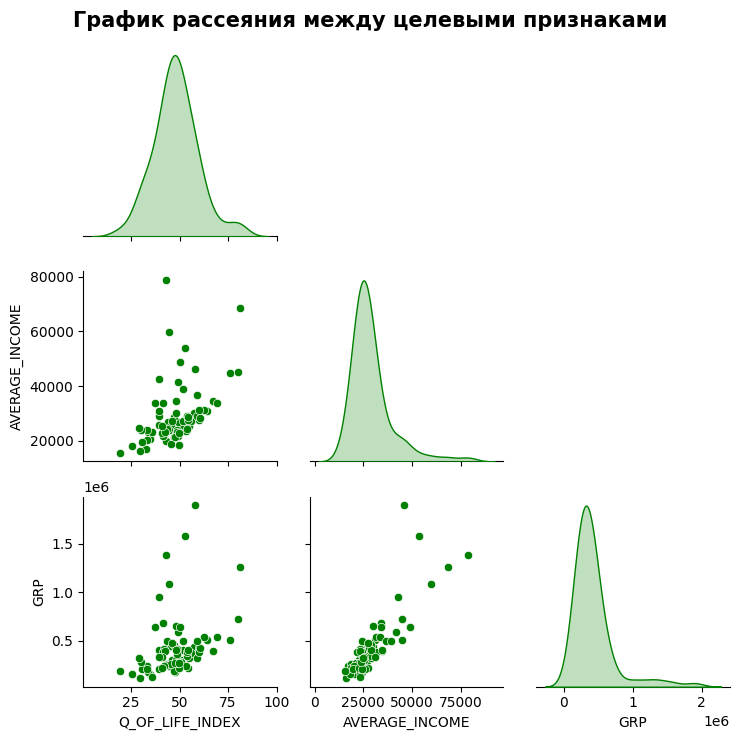

In [76]:
g = sns.pairplot(df, diag_kind='kde', diag_kws = {'color': 'green'}, plot_kws = {'color': 'green'}, corner=True)
plt.suptitle('График рассеяния между целевыми признаками', fontsize=15, fontweight='bold')
plt.tight_layout()
plt.show()


По этому графику можно заметить, что распределение индекса счастья принадлежит нормальному распределению, что не отвергалось в первом домашнем задании. По графикам рассеяния по побочным сторонам можно заметить, что средние доходы и ВРП на душу населения могут иметь определенную линейную связь. Следовательно, на этом этапе уже можно сделать предположение, что `модель будет скорее неадекватна в силу мультиколлинеарности` (мы это проверим).

Чтобы сделать больше выводов о связях, построим `матрицу корреляций`:

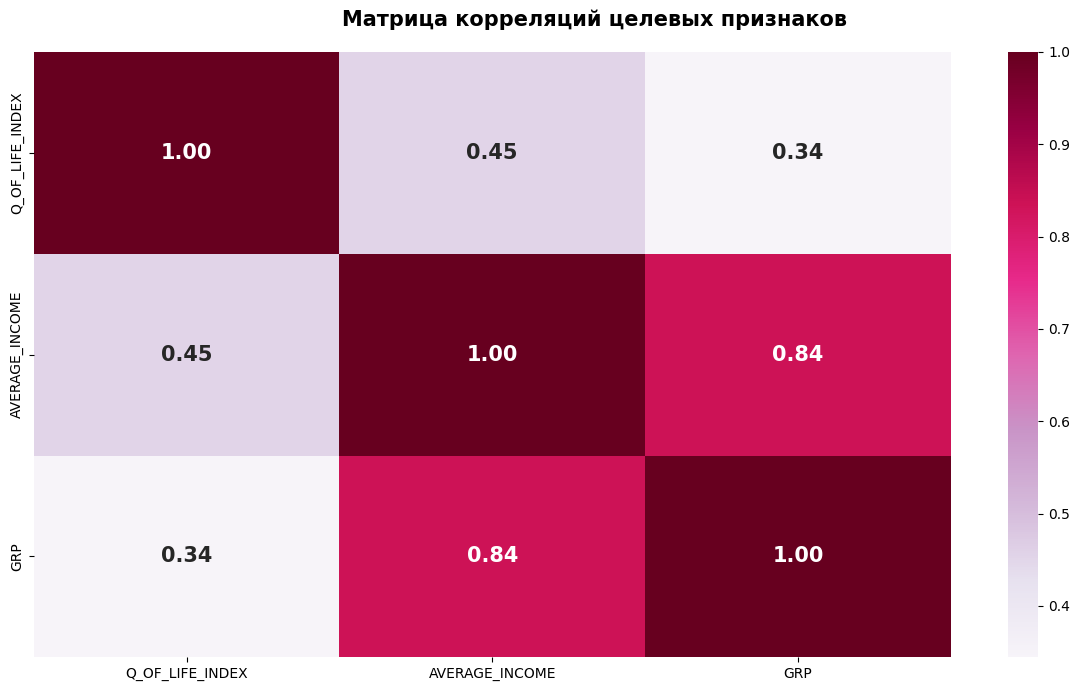

In [77]:
fig, ax = plt.subplots(figsize=(12, 7))
sns.heatmap(df.corr(), ax=ax, cmap='PuRd', annot=True, fmt='.2f', annot_kws={'weight': 'bold', 'size': 15})
plt.suptitle('Матрица корреляций целевых признаков', fontweight='bold', fontsize = 15)
plt.tight_layout()
plt.show()

Можем заметить, что предположения подтвердились, и между `среднедушевым доходом и ВРП на душу населения присутствует линейная связь`, причем сильная (**0.84**). Следовательно, при построении модели нам следует рассмотреть их **VIF (Коэффициент инфляции дисперсии)**, по которому мы сможем определить численно, насколько дисперсия коэффициента регрессии увеличивается из-за мультиколлинеарности.

`Определим целевой признак и признаки, которые будут участвовать в уравнении регрессии`. После этого `проанализируем их мультиколлинеарность` (анализировать мультиколлинеарность константного признака не имеет смысла) и сделаем определенные выводы:

In [78]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

y = df['Q_OF_LIFE_INDEX']
x = df[['AVERAGE_INCOME', 'GRP']]
x = sm.add_constant(x)
vif = pd.DataFrame()
vif['var'] = x.columns
vif['multicor coeff'] = [variance_inflation_factor(x.values, k) for k in range(x.shape[1])]
vif

,var,multicor coeff
0,const,10.666921
1,AVERAGE_INCOME,3.354940
2,GRP,3.354940


Таким образом, можно заметить, что `мультиколлинеарность имеет место быть` (значения VIF не превышают 4 для обоих признаков), поэтому модель может быть склонна к неадекватности, но она несущественна (так как принято считать, что значения меньше 10 незначительны), поэтому будем смотреть на эту модель дальше.

Выбросы удалять не буду, так как в задании этого не требуется (я предполагаю, что от нас требуют посмотреть на то, как будет выглядеть не совсем опитмальная модель), поэтому теперь `посчитаем регрессию по МНК` и получим общие результаты:

In [182]:
regression = sm.OLS(y, x).fit()
regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Q_OF_LIFE_INDEX   R-squared:                       0.208
Model:                            OLS   Adj. R-squared:                  0.188
Method:                 Least Squares   F-statistic:                     10.26
Date:                Thu, 13 Mar 2025   Prob (F-statistic):           0.000111
Time:                        18:51:20   Log-Likelihood:                -302.35
No. Observations:                  81   AIC:                             610.7
Df Residuals:                      78   BIC:                             617.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             33.1477      3.740      8.864      0.000      25.703      40.593
AVERAGE_INCOME     0.0006      0.000      2.973      0.004       0.000       0.001
GRP            -4.267e-06   6.83e-06     -0.624      0.534   -1.79e-05    9.34e-06
==============================================================================
Omnibus:                        1.194   Durbin-Watson:                   1.077
Prob(Omnibus):                  0.550   Jarque-Bera (JB):                0.914
Skew:                          -0.260   Prob(JB):                        0.633
Kurtosis:                       3.027   Cond. No.                     1.72e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.72e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Коэффициент детерминации модели говорит о том, что `регрессия описывает только 20 процентов общей вариации` - это слабо.

Коэффициенты регрессии численно показывают, насколько увеличивается целевая переменная при изменении предикторов на одну условную единицу. Например, при изменении среднего дохода на 1 у.е. целевая переменная изменится на 0.0006 условных единиц.

Заметим, что p-value F-статистики близок к нулю, следовательно, `гипотеза о равенстве нулю коэффициентов регрессии отвергается на уровне значимости 0.05` и можно сделать вывод, что **коэффициенты регрессии статистически значимы**.

Помимо этого, можно пройтись по всем t-тестам значимости коэффициентов регрессии по отдельности:

1. Коэффициент регрессии, отвечающий за **среднедушевой доход** (AVERAGE_INCOME), обладает низким p-value, следовательно, на уровне значимости 0.05 `гипотеза о равенстве нулю данного коэффициента регресcии отвергается`, следовательно, среднедушевой доход в данном уравнении регрессии **статистически значим**.

2. Коэффициент регрессии, отвечающий за **ВРП на душу населения** (GRP), обладает p-value, равным 0.534, следовательно, на уровне значимости 0.05 `гипотеза о равенстве нулю данного коэффициента регресии не отвергается`, следовательно, ВРП в данном уравнении регрессии **статистически незначим**. То есть, его можно убрать из уравнения регрессии, но в данном задании это не требуется.

Таким образом, модель не является оптимальной, так как в ней есть незначимые предикторы, слабо влияющие на output, помимо этого, в выборке есть выбросы, но я их не убирал, так как посчитал нужным показать, что данная модель (которую просят в задании) неадекватна, а также наблюдается небольшая мультиколлинеарность, поэтому можно сделать вывод о том, что эта `модель плохо описывает целевую переменную`.

Для наглядности `изобразим уравнение регрессии на плоскости`:

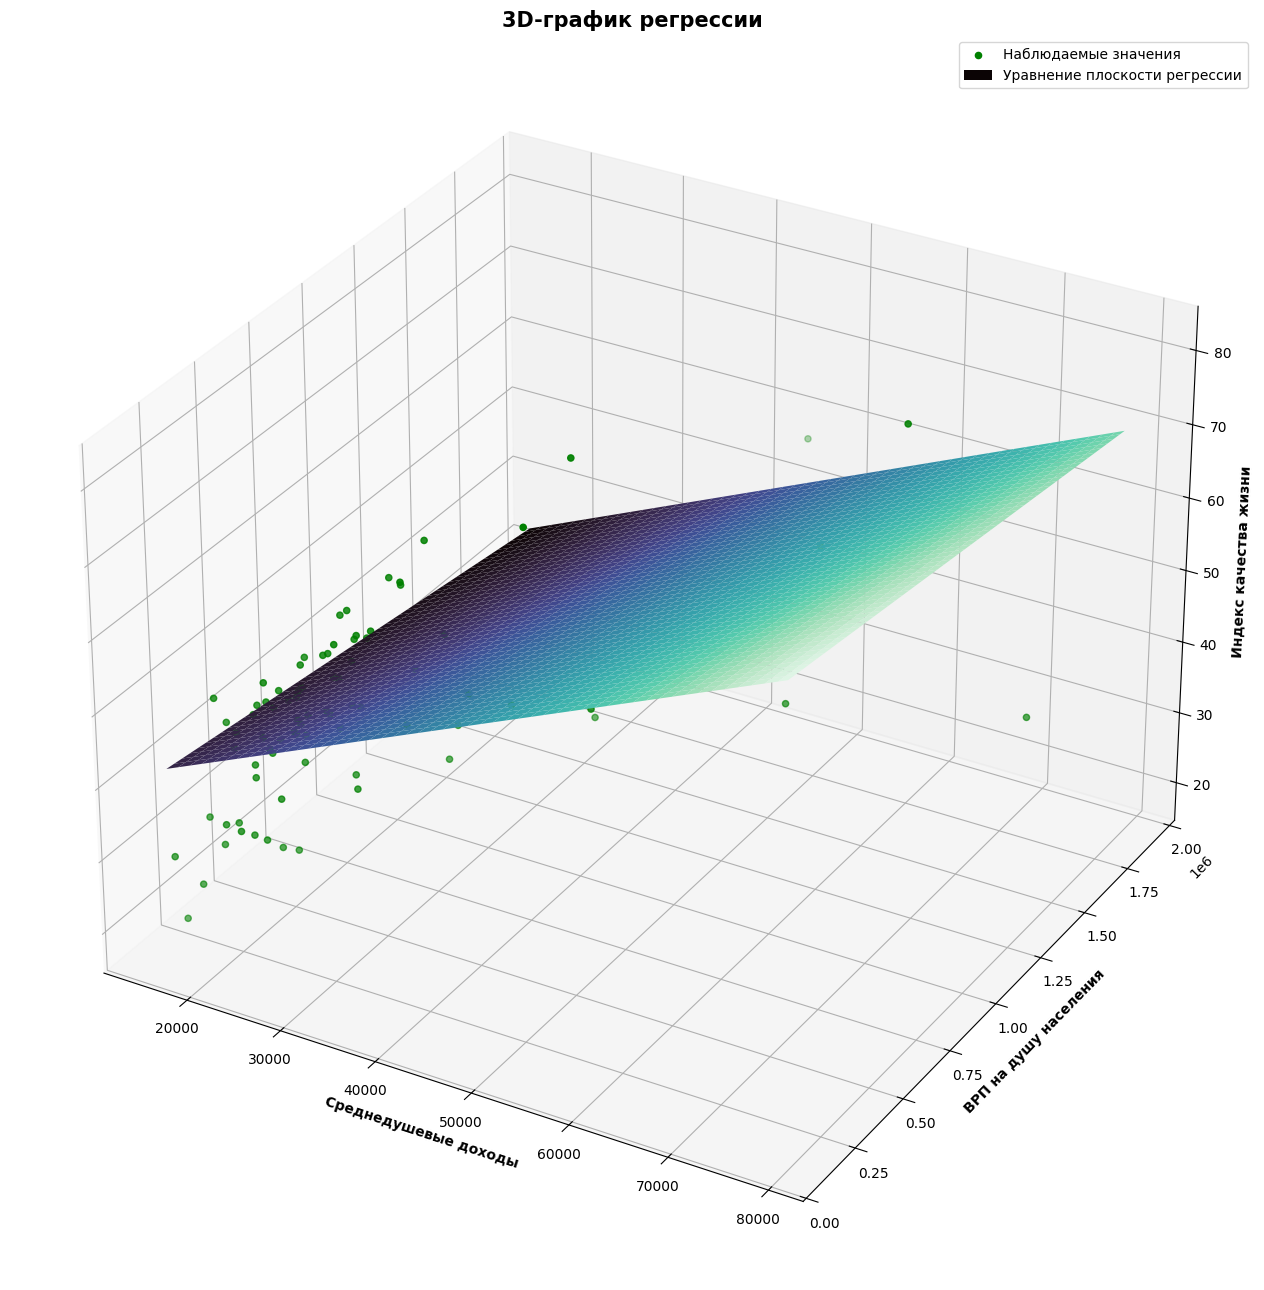

In [181]:
from mpl_toolkits.mplot3d import Axes3D

x1_range = np.linspace(df['AVERAGE_INCOME'].min(), df['AVERAGE_INCOME'].max(), 200)
x2_range = np.linspace(df['GRP'].min(), df['GRP'].max(), 200)
x1gr, x2gr = np.meshgrid(x1_range, x2_range)
xgr = pd.DataFrame({'AVERAGE_INCOME': x1gr.ravel(), 'GRP': x2gr.ravel()})
xgr = sm.add_constant(xgr)
y_pred = regression.predict(xgr).values.reshape(x1gr.shape)
fig = plt.figure(figsize=(15, 13))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['AVERAGE_INCOME'], df['GRP'], df['Q_OF_LIFE_INDEX'], 
           color='green', marker='o', label='Наблюдаемые значения')
ax.plot_surface(x1gr, x2gr, y_pred, cmap='mako', label='Уравнение плоскости регрессии')
ax.set_xlabel('Среднедушевые доходы', fontsize=10, fontweight='bold')
ax.set_ylabel('ВРП на душу населения', fontsize=10, fontweight='bold')
ax.set_zlabel('Индекс качества жизни', fontsize=10, fontweight='bold')
ax.set_title('3D-график регрессии', fontsize=15, fontweight='bold')
plt.legend()
plt.tight_layout()
plt.show()

Видим, что в силу того, что данные имеют выбросы и имеются незначимые коэффициенты, уравнение регрессии, построенное по МНК, имеет свои недочеты. Модель действительно не очень хорошо описывает целевую переменную.

### **Задание 2:**

Построим две модели, аналогичные предыдущим, только теперь `разделим выборку по федеральным округам`: в первой выборке - ЦФО, во второй - все остальные.

In [184]:
central = data[data['FEDERAL_OKRUG'].isin(['Центральный ФО'])][['Q_OF_LIFE_INDEX', 'AVERAGE_INCOME', 'GRP']]
non_central = data[~data['FEDERAL_OKRUG'].isin(['Центральный ФО'])][['Q_OF_LIFE_INDEX', 'AVERAGE_INCOME', 'GRP']]
print('Выборка с ЦФО:')
print(central.head())
print('Выборка с остальными округами:')
print(non_central.head())

Выборка с ЦФО:
   Q_OF_LIFE_INDEX  AVERAGE_INCOME       GRP
0           64.149           30778  506420.9
1           49.343           26585  253100.4
2           50.967           23539  300273.6
3           59.327           30289  370610.4
4           47.754           24503  182398.1
Выборка с остальными округами:
    Q_OF_LIFE_INDEX  AVERAGE_INCOME       GRP
18           39.150           29150  404487.6
19           41.250           33961  679162.6
20           37.428           33830  640787.5
21           44.086           26982  430625.5
22           59.823           27461  421479.2


Для начала `построим модель для ЦФО`:

In [98]:
yc = central['Q_OF_LIFE_INDEX']
xc = central[['AVERAGE_INCOME', 'GRP']]
xc = sm.add_constant(xc)
vif_central = pd.DataFrame()
vif_central['var'] = xc.columns
vif_central['multicor coeff'] = [variance_inflation_factor(xc.values, k) for k in range(xc.shape[1])]
vif_central

,var,multicor coeff
0,const,22.109865
1,AVERAGE_INCOME,11.810331
2,GRP,11.810331


Уже на данном этапе заметим, что `наблюдается существенная мультиколлинеарность у первого, и у второго признака`  (>10). То есть, наблюдается зависимость между описывающими переменными, а это нарушение предпосылок о построении регрессии. На данном этапе уже можно понять, что модель будет неадекватной, но достроим ее до конца, так как задание такового требует:

In [185]:
regression_central = sm.OLS(yc, xc).fit()
regression_central.summary()

/opt/homebrew/lib/python3.13/site-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.
  return hypotest_fun_in(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Q_OF_LIFE_INDEX   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     28.74
Date:                Thu, 13 Mar 2025   Prob (F-statistic):           7.40e-06
Time:                        19:08:28   Log-Likelihood:                -52.166
No. Observations:                  18   AIC:                             110.3
Df Residuals:                      15   BIC:                             113.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             29.7656      5.329      5.585      0.000      18.407      41.124
AVERAGE_INCOME     0.0009      0.000      2.395      0.030    9.91e-05       0.002
GRP            -3.411e-06   1.72e-05     -0.199      0.845      -4e-05    3.32e-05
==============================================================================
Omnibus:                        1.113   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.573   Jarque-Bera (JB):                0.848
Skew:                           0.221   Prob(JB):                        0.655
Kurtosis:                       2.033   Cond. No.                     2.14e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.14e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Коэффициент детерминации модели говорит о том, что `регрессия описывает 80 процентов общей вариации` - это неплохой результат.

Коэффициенты регрессии численно показывают, насколько увеличивается целевая переменная при изменении предикторов на одну условную единицу. Например, при изменении среднего дохода на 1 у.е. целевая переменная изменится на 0.0009 условных единиц.

Заметим, что p-value F-статистики близок к нулю, следовательно, `гипотеза о равенстве нулю коэффициентов регрессии отвергается на уровне значимости 0.05` и можно сделать вывод, что **коэффициенты регрессии статистически значимы**.

Помимо этого, можно пройтись по всем t-тестам значимости коэффициентов регрессии по отдельности:

1. Коэффициент регрессии, отвечающий за **среднедушевой доход** (AVERAGE_INCOME), обладает низким p-value, следовательно, на уровне значимости 0.05 `гипотеза о равенстве нулю данного коэффициента регресcии отвергается`, следовательно, среднедушевой доход в данном уравнении регрессии **статистически значим**.

2. Коэффициент регрессии, отвечающий за **ВРП на душу населения** (GRP), обладает p-value, равным 0.845, следовательно, на уровне значимости 0.05 `гипотеза о равенстве нулю данного коэффициента регресии не отвергается`, следовательно, ВРП в данном уравнении регрессии **статистически незначим**. То есть, его можно убрать из уравнения регрессии, но в данном задании это не требуется.

Общий вывод по модели заключается в том, что она `неоптимальна в силу мультиколлинеарности, незначимости коэффициентов и маленькой выборки данных`.

Теперь для `остальных федеральных округов построим модель`:

In [100]:
ync = non_central['Q_OF_LIFE_INDEX']
xnc = non_central[['AVERAGE_INCOME', 'GRP']]
xnc = sm.add_constant(xnc)
vif_ncentral = pd.DataFrame()
vif_ncentral['var'] = xnc.columns
vif_ncentral['multicor coeff'] = [variance_inflation_factor(xnc.values, k) for k in range(xnc.shape[1])]
vif_ncentral

,var,multicor coeff
0,const,10.143575
1,AVERAGE_INCOME,3.178419
2,GRP,3.178419


Заметим, что `наблюдается несущественная мультиколлинеарность у первого, и у второго признака`  (около 3). То есть, наблюдается несущественная зависимость между описывающими переменными. Теперь `построим само уравнение регрессии`:

In [101]:
regression_noncentral = sm.OLS(ync, xnc).fit()
regression_noncentral.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Q_OF_LIFE_INDEX   R-squared:                       0.133
Model:                            OLS   Adj. R-squared:                  0.104
Method:                 Least Squares   F-statistic:                     4.586
Date:                Thu, 13 Mar 2025   Prob (F-statistic):             0.0140
Time:                        17:08:08   Log-Likelihood:                -235.53
No. Observations:                  63   AIC:                             477.1
Df Residuals:                      60   BIC:                             483.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             35.7927      4.182      8.558      0.000      27.427      44.159
AVERAGE_INCOME     0.0003      0.000      1.570      0.122   -9.21e-05       0.001
GRP             1.102e-06   7.19e-06      0.153      0.879   -1.33e-05    1.55e-05
==============================================================================
Omnibus:                        0.958   Durbin-Watson:                   1.206
Prob(Omnibus):                  0.619   Jarque-Bera (JB):                0.650
Skew:                           0.248   Prob(JB):                        0.723
Kurtosis:                       3.034   Cond. No.                     1.74e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.74e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Коэффициент детерминации модели говорит о том, что `регрессия описывает только 13 процентов общей вариации` - это плохой результат.

Коэффициенты регрессии численно показывают, насколько увеличивается целевая переменная при изменении предикторов на одну условную единицу. Например, при изменении среднего дохода на 1 у.е. целевая переменная изменится на 0.0003 условных единицы.

Заметим, что p-value F-статистики близок к нулю, следовательно, `гипотеза о равенстве нулю коэффициентов регрессии отвергается на уровне значимости 0.05` и можно сделать вывод, что **коэффициенты регрессии статистически значимы**.

Помимо этого, можно пройтись по всем t-тестам значимости коэффициентов регрессии по отдельности:

1. Коэффициент регрессии, отвечающий за **среднедушевой доход** (AVERAGE_INCOME), обладает p-value, которые превышает уровень значимости, следовательно, на уровне значимости 0.05 `гипотеза о равенстве нулю данного коэффициента регресcии не отвергается`, следовательно, среднедушевой доход в данном уравнении регрессии **статистически незначим**.

2. Коэффициент регрессии, отвечающий за **ВРП на душу населения** (GRP), обладает p-value, равным 0.879, следовательно, на уровне значимости 0.05 `гипотеза о равенстве нулю данного коэффициента регресии не отвергается`, следовательно, ВРП в данном уравнении регрессии **статистически незначим**. То есть, его можно убрать из уравнения регрессии, но в данном задании это не требуется.

Таким образом, модель неоптимальна в силу того, что `коэффициенты регрессии незначимы`.

### **Задание 3:**

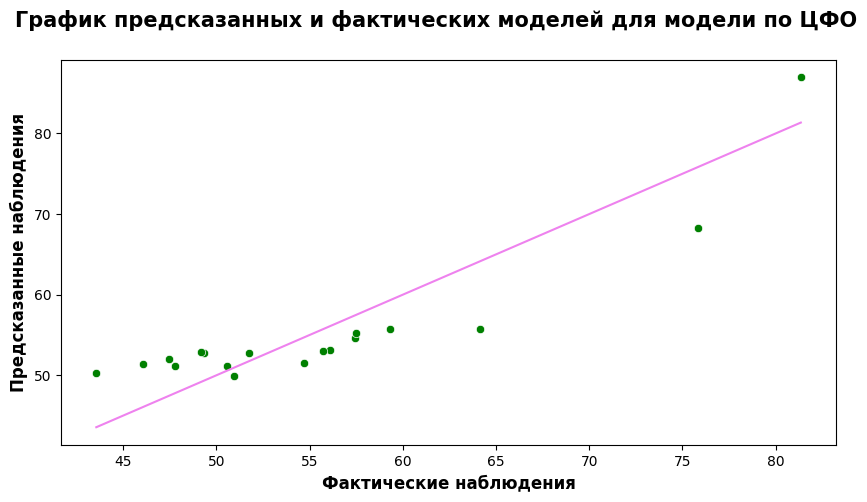

In [123]:
y_central_pred = regression_central.predict(xc)
fig, ax = plt.subplots(figsize=(10, 5))
sns.scatterplot(x=yc, y=y_central_pred, ax=ax, color='green')
plt.plot([yc.min(), yc.max()], [yc.min(), yc.max()], color='violet')
fig.suptitle('График предсказанных и фактических моделей для модели по ЦФО', fontsize=15, fontweight='bold')
ax.set_xlabel('Фактические наблюдения', fontsize=12, fontweight='bold')
ax.set_ylabel('Предсказанные наблюдения', fontsize=12, fontweight='bold')
plt.show()

Видно, что фактические и предсказанные значения сильно отклоняются друг от друга, в выборке наблюдаются выбросы, которые влияют на уравнение регрессии, это `подтверждает предыдущие выводы о неадекватности модели`.

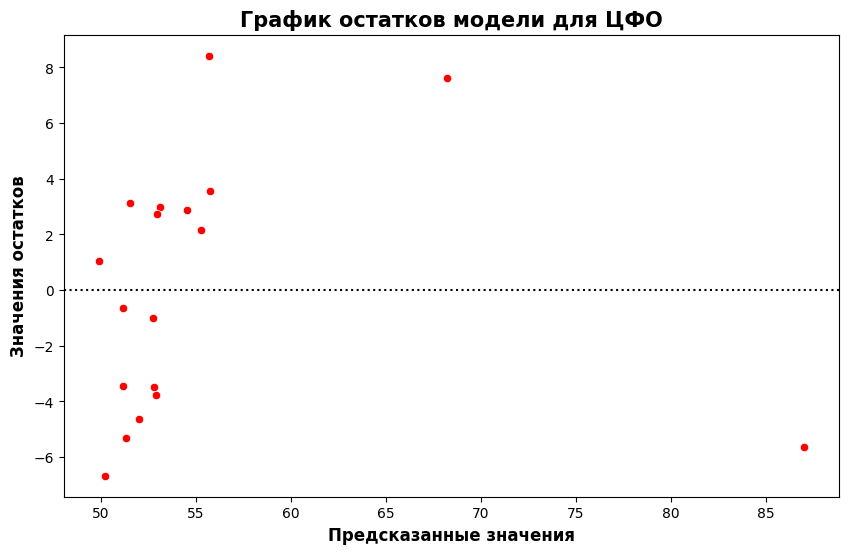

In [149]:
ostatki = regression_central.resid
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_central_pred, y=ostatki, color='red')
plt.axhline(y=0, linestyle=':', color='black')
plt.xlabel('Предсказанные значения', fontsize=12, fontweight='bold')
plt.ylabel('Значения остатков', fontsize=12, fontweight='bold')
plt.title('График остатков модели для ЦФО', fontweight='bold', fontsize=15)
plt.show()

Такие же выводы, что и выше, можно сделать по scatter-plot остатков модели. Видно, что `остатки не гомоскедастичны`, а это нарушает предпосылку регрессии, следовательно, `модель неоптимальна`.

### **Задание 4:**

Степенная модель - такая модель, которая при логарифмировании дает линейную. `Построим ее по данным из первого задания`, заодно сравним получившиеся модели. Воспользуемся этим, `прологарифмируем данные и построим модель`:

In [146]:
log_df = np.log(df)
log_x = sm.add_constant(log_df[['AVERAGE_INCOME', 'GRP']])
log_y = log_df['Q_OF_LIFE_INDEX']
log_model = sm.OLS(log_y, log_x).fit()
log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Q_OF_LIFE_INDEX   R-squared:                       0.284
Model:                            OLS   Adj. R-squared:                  0.266
Method:                 Least Squares   F-statistic:                     15.46
Date:                Thu, 13 Mar 2025   Prob (F-statistic):           2.21e-06
Time:                        17:58:39   Log-Likelihood:                 11.651
No. Observations:                  81   AIC:                            -17.30
Df Residuals:                      78   BIC:                            -10.12
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.4491      0.833     -0.539      0.591      -2.107       1.209
AVERAGE_INCOME     0.3574      0.152      2.348      0.021       0.054       0.661
GRP                0.0497      0.086      0.576      0.566      -0.122       0.222
==============================================================================
Omnibus:                        8.488   Durbin-Watson:                   0.912
Prob(Omnibus):                  0.014   Jarque-Bera (JB):                8.514
Skew:                          -0.790   Prob(JB):                       0.0142
Kurtosis:                       3.171   Cond. No.                         582.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Коэффициент детерминации модели говорит о том, что `регрессия описывает только 28 процентов общей вариации` - это не очень хороший результат.

Заметим, что p-value F-статистики близок к нулю, следовательно, `гипотеза о равенстве нулю коэффициентов регрессии отвергается на уровне значимости 0.05` и можно сделать вывод, что **коэффициенты регрессии статистически значимы**.

Помимо этого, можно пройтись по всем t-тестам значимости коэффициентов регрессии по отдельности:

1. Коэффициент регрессии, отвечающий за **среднедушевой доход** (AVERAGE_INCOME), обладает p-value, который ниже, чем уровень значимости, следовательно, на уровне значимости 0.05 `гипотеза о равенстве нулю данного коэффициента регресcии отвергается`, следовательно, среднедушевой доход в данном уравнении регрессии **статистически значим**.

2. Коэффициент регрессии, отвечающий за **ВРП на душу населения** (GRP), обладает p-value, равным 0.566, следовательно, на уровне значимости 0.05 `гипотеза о равенстве нулю данного коэффициента регресии не отвергается`, следовательно, ВРП в данном уравнении регрессии **статистически незначим**. То есть, его можно убрать из уравнения регрессии, но в данном задании это не требуется.

3. Также `константу можно убрать`, так как она незначима по результатам t-теста.

In [147]:
vif_log = pd.DataFrame()
vif_log['var'] = log_x.columns
vif_log['multicor coeff'] = [variance_inflation_factor(log_x.values, k) for k in range(log_x.shape[1])]
vif_log

,var,multicor coeff
0,const,1231.555005
1,AVERAGE_INCOME,3.787729
2,GRP,3.787729


`Мультиколлинеарность наблюдается, но незначительная`, в пределах нормы.

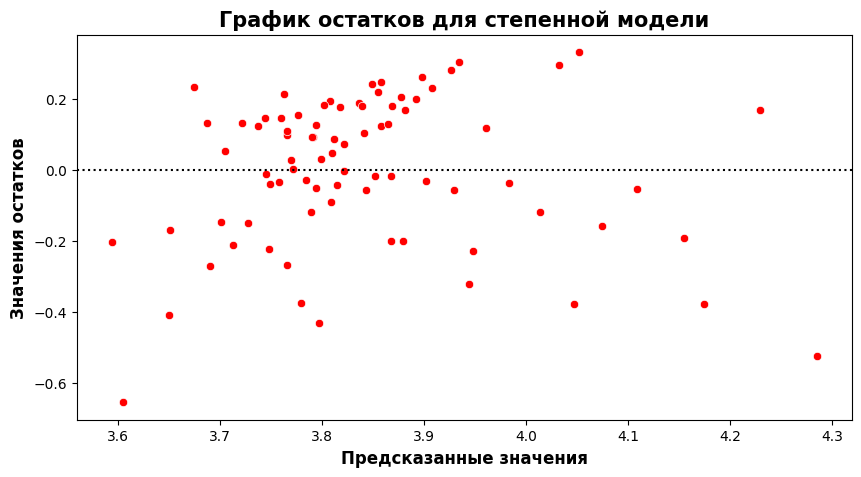

In [150]:
log_residuals = log_model.resid
log_y_pred = log_model.predict(log_x)
plt.figure(figsize=(10,5))
sns.scatterplot(x=log_y_pred, y=log_residuals, color='red')
plt.axhline(y=0, color='black', linestyle=':')
plt.xlabel('Предсказанные значения', fontsize=12, fontweight='bold')
plt.ylabel('Значения остатков', fontsize=12, fontweight='bold')
plt.title('График остатков для степенной модели', fontsize=15, fontweight='bold')
plt.show()


По остаткам можно заметить, что они лежат около нуля, следовательно, `они гомоскедастичны`. Таким образом, `модель лучше, чем линейная, так как описывает также нелинейные зависимости`, что помогает увеличить коэффициент детерминации на 8 процентов (это неплохо), но все равно, в целом, `модель неоптимальна в силу избыточности количества параметров`. Таким образом, нужно более тщательно бороться с выбросами (для этого надо понимать, какая у нас цель, чтобы понять, что делать с выбросами, поэтому здесь я их не удалял), а также подбирать коэффициенты методом включения и исключения.